## Importing necessary libraries

In [100]:
import cv2                           #opencv
import os                            #to access images in directory
import numpy as np                   #images are converted to numpy arrays
import matplotlib.pyplot as plt     #for visualization
%matplotlib inline

from collections import Counter      #to count labels formed by KMeans prediction

from sklearn.cluster import KMeans  
from skimage.color import rgb2lab, deltaE_cie76   #to convert RGB to lab, and calculating similarity

Shape: (408, 732, 3)


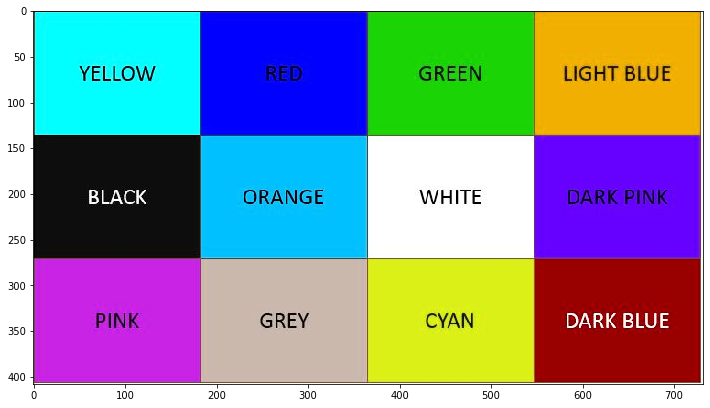

In [2]:
image=cv2.imread('colours.JPG')

plt.figure(figsize=(12,7))
print("Shape: {}".format(image.shape))
plt.imshow(image)

### Since OpenCV reads images in the BGR format

Shape: (408, 732, 3)


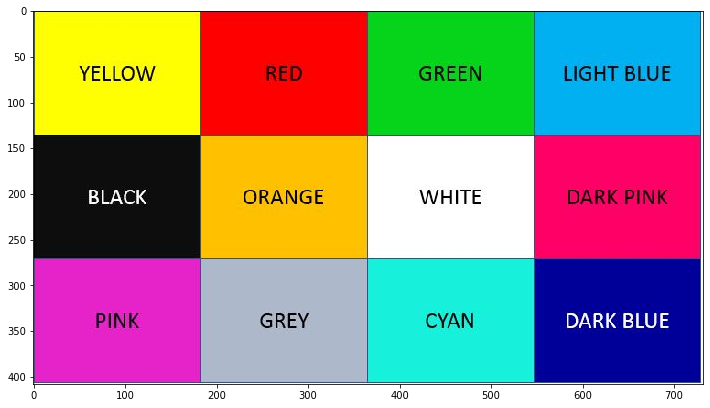

In [3]:
image=cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

plt.figure(figsize=(12,7))
print("Shape: {}".format(image.shape))
plt.imshow(image)

# Color Identification

### Function for coverting RGB to HEX

In [4]:
def RGB2HEX(color):
    return "#{:02x}{:02x}{:02x}".format(int(color[0]), int(color[1]), int(color[2]))

### Function to convert BGR to RGB

In [5]:
def get_img(image_path):
    image = cv2.imread(image_path)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    return image

## K-Means training

In [22]:
def get_colours(image, no_of_colours, pie):
    
    modified_image = cv2.resize(image, (700, 500), interpolation = cv2.INTER_AREA)
    modified_image = modified_image.reshape(modified_image.shape[0]*modified_image.shape[1], 3) #KMeans required 2D input
    
    clf = KMeans(n_clusters = no_of_colours)
    labels = clf.fit_predict(modified_image)
    
    counts = Counter(labels)              #set a counter on the labels
    
    counts = dict(sorted(counts.items())) # sort to ensure correct color percentage
    
    center_colors = clf.cluster_centers_
    
    # We get ordered colors by iterating through the keys
    ordered_colors = [center_colors[i] for i in counts.keys()]
    hex_colors = [RGB2HEX(ordered_colors[i]) for i in counts.keys()]
    rgb_colors = [ordered_colors[i] for i in counts.keys()]

    if (pie):
        plt.figure(figsize = (8, 6))
        plt.pie(counts.values(), labels = hex_colors, colors = hex_colors)
    
    return rgb_colors

[array([213.30081058, 219.17349346, 228.32295196]),
 array([13.88377861, 13.48709698, 79.45105642]),
 array([249.9601623 ,   1.89528016,  50.4438879 ]),
 array([252.15589238, 222.12819731,   4.88407175]),
 array([ 15.05668766, 205.3945553 , 227.00374036]),
 array([  8.07951501, 208.73026223,  28.36916678]),
 array([223.52991077,  37.18740706, 196.20667162])]

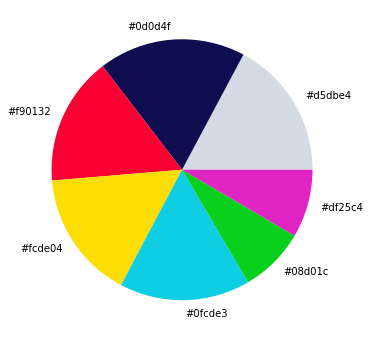

In [26]:
get_colors(get_img('colours.jpg'), 7, True)

# Searching images using colour

From the trained model, the major colours can be extracted (depending on the number of clusters). Now, we can search images via a colour, i.e if a the colour's (that we would search) hex value matches or is close to the hex of the major colours of an image, it's a match!

RGB colour codes picked from https://flaviocopes.com/rgb-color-codes/ <br>
Images in Images directory downloaded from https://wallpapercave.com/

In [53]:
img_dir='Images'

COLOURS={
    'GREEN':[0,128,0],
    'RED': [255,0,0],
    'CYAN': [0,255,255],
    'BLUE': [0,0,255],
    'INDIGO': [75,0,130],
    'PURPLE': [128,0,128],
    'WHITE': [255,255,255],
    'BLACK': [0,0,0],
    'PINK': [255,192,203],
    'LIME': [0,255,0],
    'YELLOW': [255,255,0],
    'ORANGE':[255, 100,0]
     }

In [54]:
images=[]

for f in os.listdir(img_dir):
    images.append(get_img(os.path.join(img_dir,f)))
    

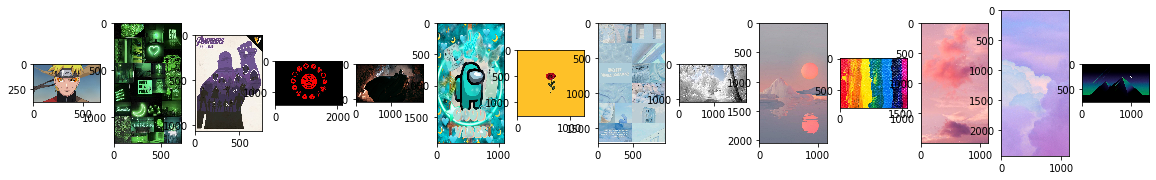

In [55]:
plt.figure(figsize=(20, 10))
for i in range(len(images)):
    plt.subplot(1, len(images), i+1)
    plt.imshow(images[i])

In [58]:
len(images)

14

#### Displaying all images in the image directory

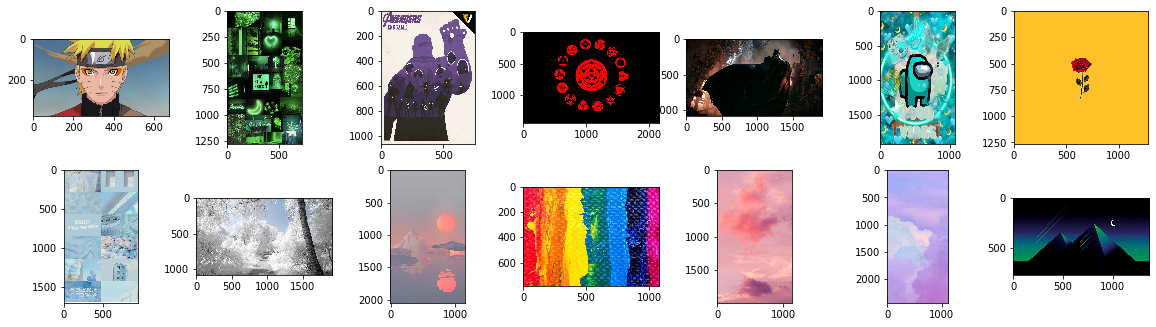

In [68]:
plt.figure(figsize=(20, 20))

col=len(images)/2
row=len(images)-col

for i in range(len(images)):
    
    plt.subplot(row, col, i+1)
    plt.imshow(images[i])
    
    

In [89]:
def match_by_colour(image, colour, threshold=50, no_of_colours=10):
    
    img_colours=get_colours(image, no_of_colours, False)
    selected_colour = rgb2lab(np.uint8(np.asarray([[colour]])))
    
    select_image = False
    
    for i in range(no_of_colours):
        curr_colour = rgb2lab(np.uint8(np.asarray([[img_colours[i]]])))
        diff = deltaE_cie76(selected_colour, curr_colour)
        if (diff < threshold):
            select_image = True
    
    return select_image
    


For each colour, the loop changes it to lab, finds the delta (basically difference) between the selected colour and the colour in iteration and if the delta is less than the threshold, the image is selected as matching with the colour. <br> <br>

The threshold basically defines how different can the colours of the image and selected colour be.

In [92]:
def show_selected_images(images, colour, colours_to_match,threshold=50 ):
    index = 1
    
    for i in range(len(images)):
        selected = match_by_colour(images[i],
                                        colour,
                                        threshold,
                                        colours_to_match)
        if (selected):
            plt.subplot(1, len(images), index)
            plt.imshow(images[i])
            index += 1

# RESULTS

Based upon our choice of colour (from the COLOURS dictionary) images having that colour or a similar colour (difference less than the threshold value) will be selected and displayed.

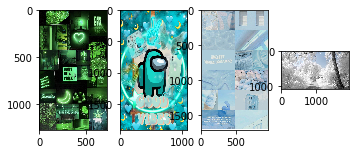

In [93]:
chosen_colour=COLOURS['CYAN']

plt.figure(figsize = (20, 10))
show_selected_images(images, chosen_colour, 5, 50)

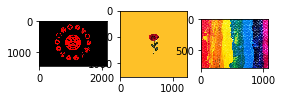

In [94]:
chosen_colour=COLOURS['RED']

plt.figure(figsize = (20, 10))
show_selected_images(images, chosen_colour, 5, 50)

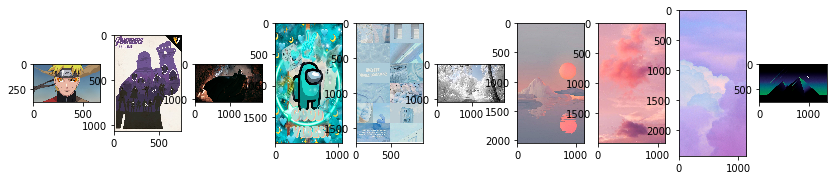

In [99]:
chosen_colour=COLOURS['PINK']

plt.figure(figsize = (20, 10))
show_selected_images(images, chosen_colour, 5, 50)

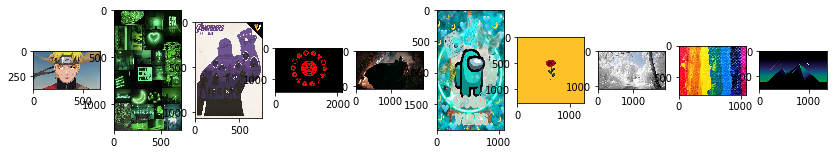

In [98]:
chosen_colour=COLOURS['BLACK']

plt.figure(figsize = (20, 10))
show_selected_images(images, chosen_colour, 5, 50)

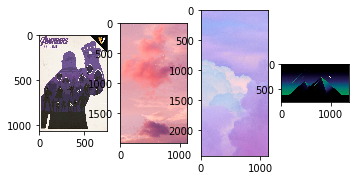

In [97]:
chosen_colour=COLOURS['PURPLE']

plt.figure(figsize = (20, 10))
show_selected_images(images, chosen_colour, 5, 50)